<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/03_72_Randomized_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In Class Exercise - Randomized SVD**

The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/kursatkara/databook_python/blob/master/CH01/CH01_SEC08_RSVD.ipynb

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

plt.rcParams.update({'font.size': 12})

# Define randomized SVD function
def rSVD(X,r,q,p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny,r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z,mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y,full_matrices=0)
    U = Q @ UY

    return U, S, VT

In [ ]:
# Import the v2 API explicitly
import imageio.v2 as imageio

# Direct URL of the image
image_url = 'https://github.com/kursatkara/MAE_5020_S24/raw/master/Data/jupiter.jpg'

# Reading the image directly from the URL using the v2 API
A = imageio.imread(image_url)

X = np.mean(A,axis=2) # Convert RGB -> grayscale


**Effects of Power Iterations on Singular Value Distribution**

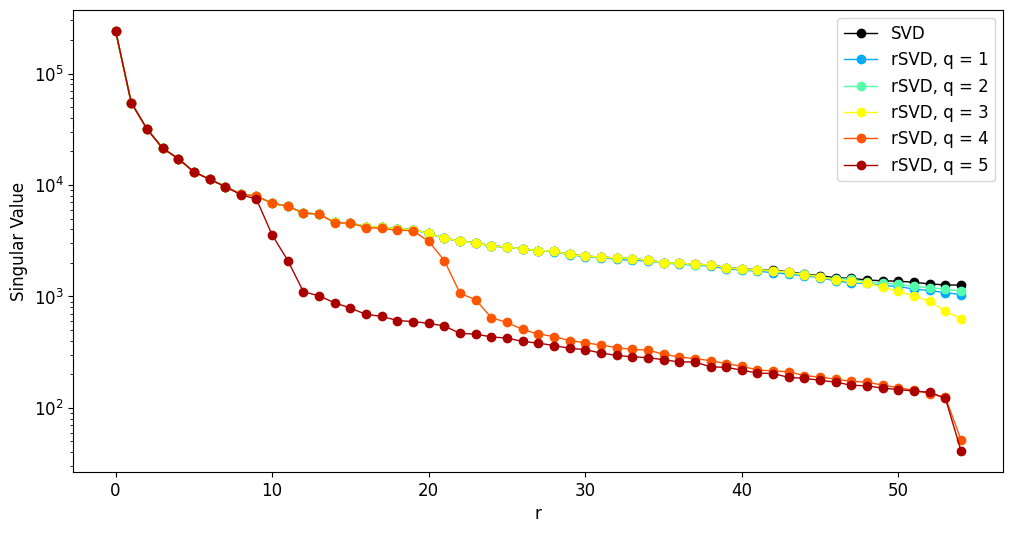

In [ ]:
## Power Iterations

# Figure parameters
plt.rcParams['figure.figsize'] = [12,6]

# Define color map
color_list = np.array(
                 [[0,0,2/3],
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

# Randomized SVD parameters
r = 50 # Target rank
#q = 2   # Power iterations
p = 5   # Oversampling parameter

# Regular SVD
U, S, VT = np.linalg.svd(X,full_matrices=0)
plt.semilogy(S[0:r+p],'o-',color='k',linewidth=1,label='SVD')

#Randomized SVD with increasing number of power iterations
for q in range(1,6):
    Uq, Sq, VTq = rSVD(X,r,q,p)
    plt.semilogy(Sq,'-o',color=tuple(color_list[2*q+1]),linewidth=1,label='rSVD, q = '+str(q))

plt.xlabel('r')
plt.ylabel('Singular Value')

plt.legend()
plt.show()

**Reconstruction using randomized SVD with power iterations**


CPU times: user 711 ms, sys: 70.4 ms, total: 782 ms
Wall time: 431 ms


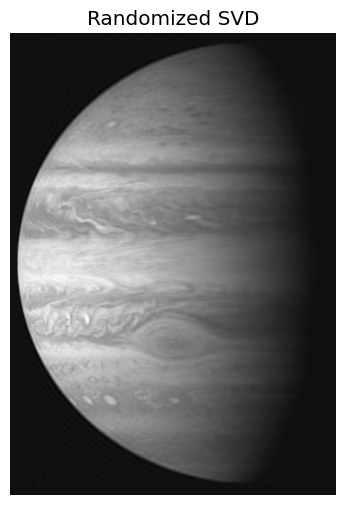

(3207, 2260) 7247820


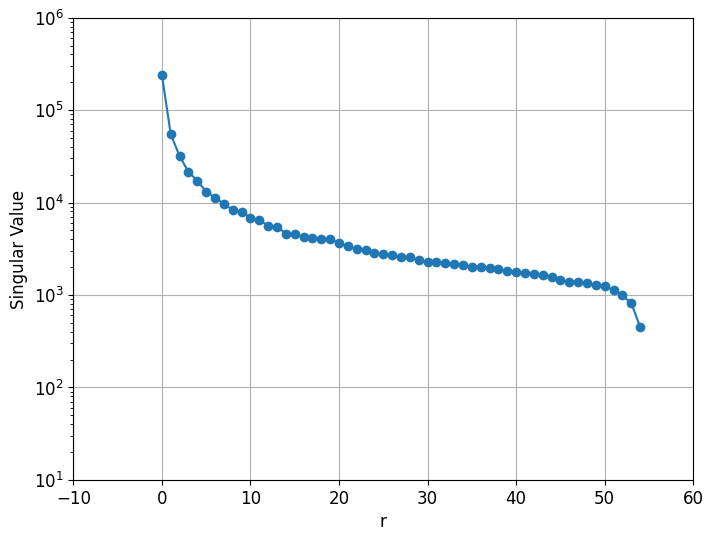

In [ ]:

r = 50 # Target rank
q = 3   # Power iterations
p = 5   # Oversampling parameter

%time rU, rS, rVT = rSVD(X,r,q,p)

XrSVD = rU[:,:(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1),:] # SVD approximation
# Plot the reconstruction using the randomized SVD
plt.imshow(XrSVD, cmap='gray')
plt.axis('off')
plt.title('Randomized SVD')
plt.show()
print(XrSVD.shape, XrSVD.size)

plt.rcParams['figure.figsize'] = [8,6]
plt.semilogy(rS,'-o')
plt.xlabel('r')
plt.ylabel('Singular Value')
plt.xlim(-10,r+10)
plt.ylim(1e1,1e6)
plt.grid()
plt.show()